In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score 

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [5]:
maindf=pd.read_csv('BTC-USD.csv')

In [6]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  3290
Total number of fields present in the dataset:  7


In [7]:
maindf.shape

(3290, 7)

In [8]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0


In [9]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3285,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,1.601393e+10
3286,2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,42265.187500,1.639750e+10
3287,2024-01-01,42280.234375,44175.437500,42214.976563,44167.332031,44167.332031,1.842698e+10
3288,2024-01-02,NaN,NaN,NaN,NaN,NaN,NaN
3289,2024-01-03,44961.601563,45392.242188,44916.445313,45268.328125,45268.328125,3.229370e+10


In [10]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3290 non-null   object 
 1   Open       3289 non-null   float64
 2   High       3289 non-null   float64
 3   Low        3289 non-null   float64
 4   Close      3289 non-null   float64
 5   Adj Close  3289 non-null   float64
 6   Volume     3289 non-null   float64
dtypes: float64(6), object(1)
memory usage: 180.1+ KB


In [11]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3.289000e+03
mean,15047.613465,15399.510862,14669.544266,15059.671351,15059.671351,1.708693e+10
std,16250.685258,16640.922976,15814.344769,16253.745685,16253.745685,1.915010e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1187.300049,1207.140015,1172.609985,1187.869995,1187.869995,3.373910e+08
50%,8661.760742,8836.190430,8394.459961,8660.700195,8660.700195,1.278545e+10
75%,25575.283203,25970.285156,24930.296875,25753.236328,25753.236328,2.742369e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [12]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 6


In [13]:
print('NA values:',maindf.isnull().values.any())

NA values: True


In [14]:
maindf.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

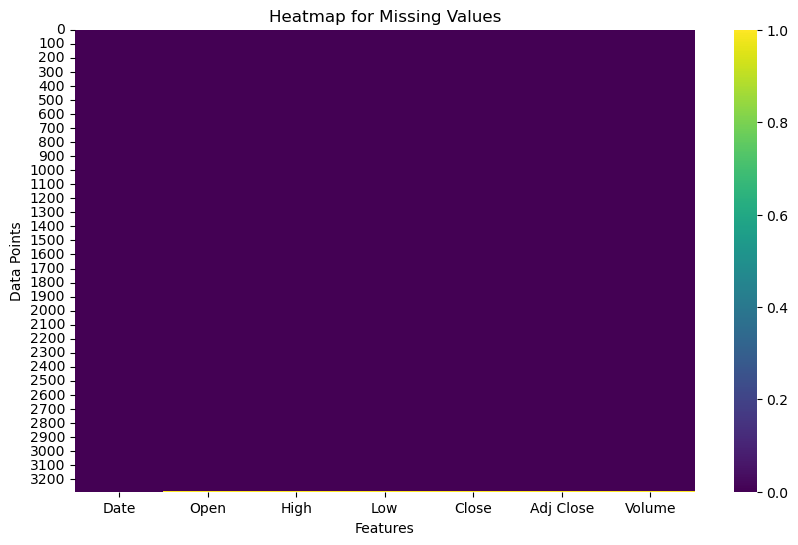

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(maindf.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap for Missing Values')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

In [16]:
maindf=maindf.dropna()

In [17]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [18]:
maindf.notnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
3284,True,True,True,True,True,True,True
3285,True,True,True,True,True,True,True
3286,True,True,True,True,True,True,True
3287,True,True,True,True,True,True,True


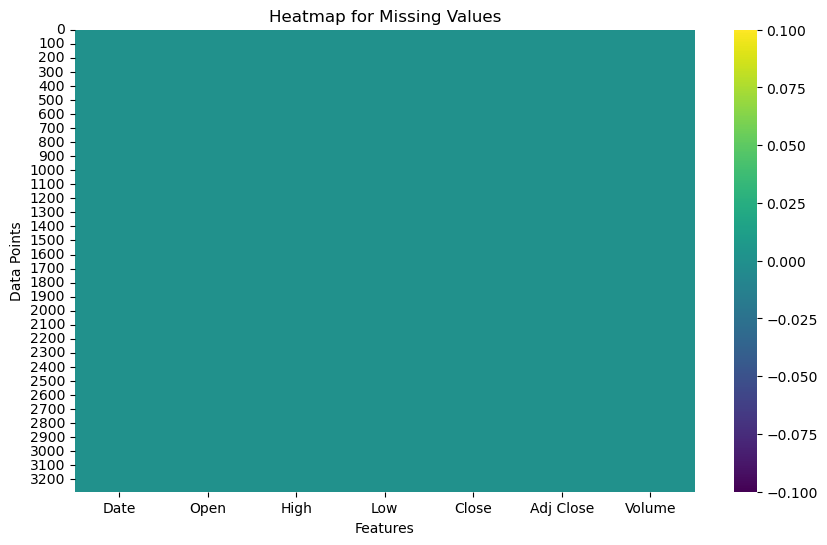

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(maindf.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap for Missing Values')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

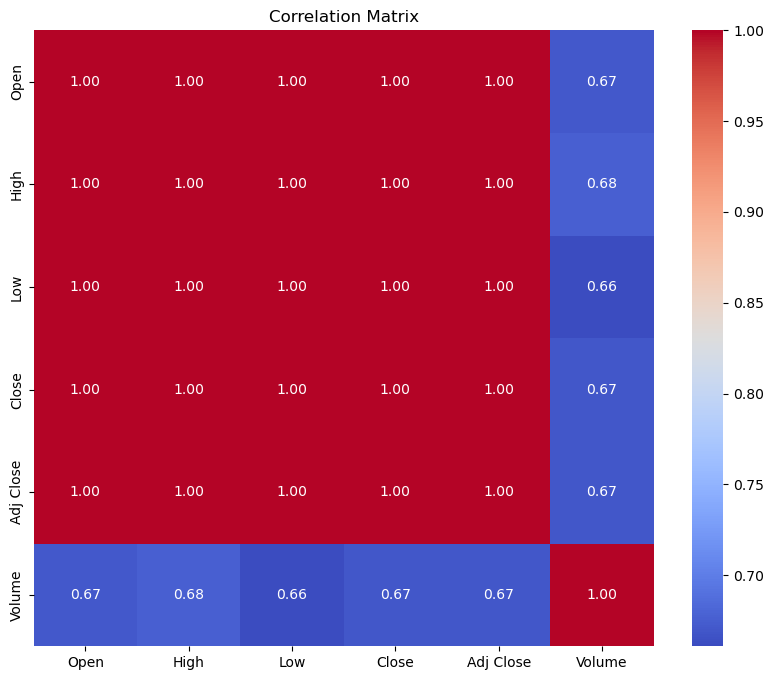

In [20]:
# Selecting relevant features
selected_features = maindf[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Compute correlation matrix
correlation_matrix = selected_features.corr()

# Visualize correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [21]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2015-01-01
Ending Date 2024-01-03


In [22]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] <= '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1826,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
1827,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
1828,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
1829,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
1830,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
2188,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
2189,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
2190,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125
2191,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703


In [23]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


,Open,Close
Date,,
January,8965.045227,9045.048035
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477328
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276856


In [24]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [25]:
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [26]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [27]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2192,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
2193,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
2194,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
2195,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063
2196,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
2551,2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625
2552,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
2553,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
2554,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938


In [28]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967216,46306.798968
March,54544.678176,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154688
July,34234.212450,34444.973790
August,45516.119834,45709.022682
September,46041.859375,45939.771484


In [29]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()


In [30]:
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()


In [31]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [32]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')
                     & (maindf['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2557,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
2558,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
2559,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188
2560,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219
2561,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
...,...,...,...,...,...
2916,2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688
2917,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828
2918,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266
2919,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797


In [33]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40591.103934,40763.474051
March,41889.148438,41966.237525
April,41694.653646,41435.319662
May,31900.711127,31706.105217
June,24783.338477,24383.685482
July,21424.733052,21539.253843
August,22471.866557,22366.266318
September,19821.353711,19804.779232


In [34]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()


In [35]:
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [36]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [37]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2023 = maindf.loc[(maindf['Date'] >= '2023-01-01')
                     & (maindf['Date'] < '2023-12-31')]

y_2023.drop(y_2023[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
2922,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078
2923,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703
2924,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422
2925,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281
2926,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328
...,...,...,...,...,...
3281,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344
3282,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469
3283,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469
3284,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344


In [38]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20043.860131,20250.717490
February,23304.086007,23304.539202
March,24945.340411,25116.900895
April,28823.841732,28857.574544
May,27562.723160,27499.307145
June,27651.926758,27763.198438
July,30098.767578,30057.469947
August,27959.756615,27852.792843
September,26271.268229,26306.136393


In [39]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()


In [40]:
monthvise_high = y_2023.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2023.groupby(y_2023['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [41]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Open'], y_2023['Close'],
                                          y_2023['High'], y_2023['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [42]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2015-01-01')
                     & (maindf['Date'] <= '2023-12-31')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2015-01-01,320.434998,320.434998,314.002991,314.248993
1,2015-01-02,314.079010,315.838989,313.565002,315.032013
2,2015-01-03,314.846008,315.149994,281.082001,281.082001
3,2015-01-04,281.145996,287.230011,257.612000,264.195007
4,2015-01-05,265.084015,278.341003,265.084015,274.473999
...,...,...,...,...,...
3282,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469
3283,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469
3284,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344
3285,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344


In [43]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,13653.879059,13653.079616
February,14841.738755,14909.331519
March,15918.528798,15975.969187
April,16654.181964,16645.847732
May,14897.735676,14807.430843
June,13058.934120,13023.092093
July,12946.813125,12989.735743
August,14402.491680,14403.907037
September,13802.294043,13782.220816


In [44]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [45]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3289, 2)


In [46]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2015-2023', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [47]:
closedf = closedf[closedf['Date'] > '2021-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1096


In [48]:
closedf

,Date,Close
2193,2021-01-02,32127.267578
2194,2021-01-03,32782.023438
2195,2021-01-04,31971.914063
2196,2021-01-05,33992.429688
2197,2021-01-06,36824.363281
...,...,...
3284,2023-12-29,42099.402344
3285,2023-12-30,42156.902344
3286,2023-12-31,42265.187500
3287,2024-01-01,44167.332031


In [49]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [50]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1096, 1)


In [51]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (657, 1)
test_data:  (439, 1)


In [52]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
num_folds = 5  
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(kf.split(closedf), 1):
    train_data, test_data = closedf[train_index], closedf[test_index]
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (861, 15)
y_train:  (861,)
X_test:  (203, 15)
y_test (203,)


In [54]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (861, 15, 1)
X_test:  (203, 15, 1)


In [55]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [56]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200

27/27 [==============================] - 2s 12ms/step - loss: 0.1917 - val_loss: 0.1083
Epoch 2/200
27/27 [==============================] - 0s 6ms/step - loss: 0.1115 - val_loss: 0.0608
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.0289
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.0204
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.0193
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0178
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0168
Epoch 8/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0076 - val_loss: 0.0163
Epoch 9/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0071 - val_loss: 0.0156
Epoch 10/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0154
Epoch 1

In [57]:
def cross_validate_regression(model, X, y, num_folds=10):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    r2_list = []
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        trainX, trainY = create_dataset(closedf[train_index], time_step=1)
        testX, testY = create_dataset(closedf[test_index], time_step=1)

        # Train the model
        model.fit(trainX, trainY)

        # Make predictions
        predictions = model.predict(testX)

        # Evaluate and store the R-squared
        r2 = r2_score(testY, predictions)
        r2_list.append(r2)

    # Print average R-squared across all folds
    avg_r2 = np.mean(r2_list)
    return avg_r2
X, y = create_dataset(closedf, time_step=1)

In [58]:
mod1 = LinearRegression()
linear=cross_validate_regression(mod1,X,y)
print("Linear Regression:",linear)

Linear Regression: 0.8935199894512348


In [59]:
mod2 = RandomForestRegressor(n_estimators=100, random_state=42)
random=cross_validate_regression(mod2,X,y)
print("Random Forest Regression:",random)

Random Forest Regression: 0.8900407866229472


In [60]:
mod3 = XGBRegressor()
xgb_model=cross_validate_regression(mod3, X, y)
print("XGBoost Regression:",xgb_model)

XGBoost Regression: 0.8949562546982689


In [61]:
mod4 = DecisionTreeRegressor(random_state=42)
decision=cross_validate_regression(mod4, X, y)
print("Decision Tree Regression:",decision)

Decision Tree Regression: 0.8838118133700359


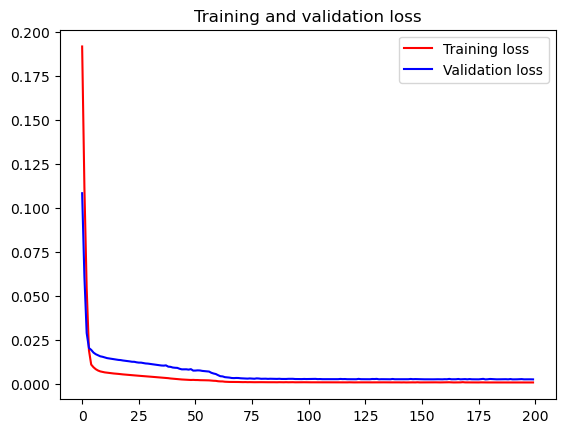

<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [63]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

7/7 [==============================] - 0s 3ms/step


((861, 1), (203, 1))

In [64]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [65]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1454.4015113119378
Train data MSE:  2115283.756106449
Train data MAE:  966.4030946118612
-------------------------------------------------------------------------------------
Test data RMSE:  2607.310396279295
Test data MSE:  6798067.502546096
Test data MAE:  1665.266154194889


In [66]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9874077694862597
Test data explained variance regression score: 0.9519407581937839


In [67]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9870765436372627
Test data R2 score: 0.9518456114290379


In [68]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0014004460413552238
Test data MGD:  0.005541094743057531
----------------------------------------------------------------------
Train data MPD:  51.71407900235928
Test data MPD:  182.19561389065976


In [69]:

scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_step,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)



Epoch 1/200
27/27 [==============================] - 1s 6ms/step - loss: 0.0243 - val_loss: 0.0120
Epoch 2/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0100
Epoch 3/200
27/27 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0077
Epoch 4/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0069
Epoch 5/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0063
Epoch 6/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0062
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 8/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0054
Epoch 9/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 10/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 11/

In [70]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data RMSE:  1454.4015113119378
Test data RMSE:  2607.310396279295
Train data R2 score: 0.9870765436372627
Test data R2 score: 0.9518456114290379


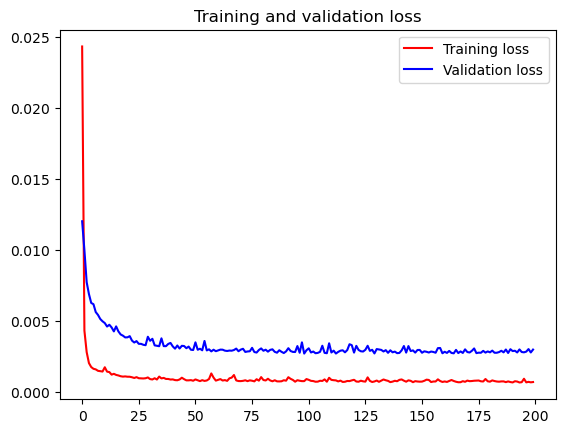

In [71]:
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [72]:

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1096, 1)
Test predicted data:  (1096, 1)


In [73]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [74]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [75]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
df_result=new_pred_plot.dropna()
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(df_result,x=df_result.index, y=[df_result['last_original_days_value'],
                                                      df_result['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [76]:
print(df_result)

    last_original_days_value  next_predicted_days_value
0                   0.511461                   0.511461
1                   0.538146                   0.538146
2                   0.542335                   0.542335
3                   0.544822                   0.544822
4                   0.539832                   0.539832
5                   0.525861                   0.525861
6                   0.537391                   0.537391
7                   0.516287                   0.516287
8                   0.534102                   0.534102
9                   0.518362                   0.518362
10                  0.508157                   0.508157
11                  0.509267                   0.509267
12                  0.511358                   0.511358
13                  0.548094                   0.548094
14                  0.569357                   0.569357
16                  0.536232                   0.536232
17                  0.566201                   0

In [77]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [78]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 1
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next day: ", len(lst_output))

Output of predicted next day:  1


In [79]:
last_days=np.arange(1,1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[]
[16]


In [80]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 1 day close price'])
df_result=new_pred_plot.dropna()
names = cycle(['Last 15 days close price','Predicted next 1 day close price'])

fig = px.line(df_result,x=df_result.index, y=[df_result['last_original_days_value'], df_result['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 1 day',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()